In [22]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [23]:
from prophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [24]:
df_acum= pd.read_excel('df_copia_seguridad01-05-2022.xlsx')

In [7]:
df_acum['Precio gasolina 95 E5'] = df_acum['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
df_acum.drop(df_acum.loc[df_acum['Precio gasolina 95 E5']=='No disponible'].index, inplace=True)

df_acum['Precio gasolina 95 E5']=df_acum['Precio gasolina 95 E5'].astype('float64')


In [8]:
df_acum

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción
0,ALBACETE,ABENGIBRE,ABENGIBRE,2250,"AVENIDA CASTILLA LA MANCHA, 26","-1,539167","39,211417",1.799,No disponible,No disponible,"1,829",No disponible,Nº 10.935,L-D: 07:00-22:00,04-04-2022
1,ALBACETE,ALATOZ,ALATOZ,2152,"CR CM-332, 46,4","-1,346083","39,100389",1.869,No disponible,"2,000","1,950","2,000",REPSOL,L-D: 7:00-23:00,04-04-2022
3,ALBACETE,ALBACETE,ALBACETE,2001,"AVENIDA 1º DE MAYO, S/N","-1,868500","38,985667",1.809,No disponible,"1,899","1,829","1,859",CARREFOUR,L-S: 08:00-22:00; D: 09:00-21:00,04-04-2022
4,ALBACETE,ALBACETE,ALBACETE,2001,CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA...,"-1,832000","39,054694",1.769,No disponible,"1,911","1,849","1,939",BP ROMICA,L-D: 06:00-21:30,04-04-2022
5,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 1","-1,849833","39,000861",1.677,No disponible,No disponible,"1,757",No disponible,PLENOIL,L-D: 24H,04-04-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454637,ZARAGOZA,Zaragoza,VILLARRAPA,50692,"AUTOVIA A-68 KM. 258,25","-1,078944","41,740389",1.889,No disponible,"1,999","1,929","1,999",REPSOL,L-V: 05:00-22:00; S-D: 08:00-22:00,01-05-2022
454638,ZARAGOZA,Zaragoza,ZARAGOZA,50197,"AVENIDA DIAGONAL PLAZA, 22","-0,990111","41,636528",1.919,No disponible,"2,058","1,949","2,009",REPSOL,L-V: 06:00-22:00; S: 08:00-15:00,01-05-2022
454641,ZARAGOZA,Zuera,ZUERA,50800,"CARRETERA N-330A KM. 24,000","-0,794000","41,857000",1.889,No disponible,"2,019","1,929","1,999",REPSOL,L-D: 06:00-22:00,01-05-2022
454642,ZARAGOZA,Zuera,ZUERA,50800,"CALLE AUSTRIA, 11,17","-0,782833","41,883583",1.817,No disponible,No disponible,"1,828","1,868",COOPERATIVA SAN LICER,L-D: 24H,01-05-2022


In [9]:
df_todas_gasolineras = df_acum.groupby(["Fecha de extracción"])["Precio gasolina 95 E5"].median()
df_prophet_espana=pd.DataFrame(df_todas_gasolineras).reset_index()
df_prophet_espana.columns = ['ds', 'y']
df_prophet_espana

,ds,y
0,01-05-2022,1.869
1,04-04-2022,1.803
2,05-04-2022,1.799
3,09-04-2022,1.794
4,10-04-2022,1.789
5,11-04-2022,1.789
6,12-04-2022,1.789
7,14-04-2022,1.789
8,15-04-2022,1.799
9,16-04-2022,1.805


In [10]:
#df_grafico[0]['Precio gasolina 95 E5'] = df_grafico[0]['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
#df_grafico[0]['Precio gasóleo A'] = df_grafico[0]['Precio gasóleo A'].apply(lambda x: x.replace(',','.'))
#df_grafico[0]['Precio gasolina 95 E5']=df_grafico[0]['Precio gasolina 95 E5'].astype('float64')
#df_grafico[0]['Precio gasóleo A']=df_grafico[0]['Precio gasóleo A'].astype('float64')

In [11]:
format_data = '%d-%m-%Y'
df_prophet_espana['ds']=df_prophet_espana['ds'].apply(lambda x: datetime.datetime.strptime(x,format_data))


In [12]:
df_prophet_espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      24 non-null     datetime64[ns]
 1   y       24 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 512.0 bytes


In [13]:
my_model = Prophet(interval_width=0.95, changepoint_prior_scale=0.5, daily_seasonality=False, yearly_seasonality=False)

In [14]:
my_model.fit(df_prophet_espana, iter=300)

2022-05-02 13:05:49.434 INFO    prophet: n_changepoints greater than number of observations. Using 18.



Initial log joint probability = -48.6865
Iteration  1. Log joint probability =     30.747. Improved by 79.4335.
Iteration  2. Log joint probability =    86.0164. Improved by 55.2694.
Iteration  3. Log joint probability =     102.21. Improved by 16.1933.
Iteration  4. Log joint probability =    116.375. Improved by 14.1658.
Iteration  5. Log joint probability =    117.375. Improved by 0.99963.
Iteration  6. Log joint probability =    117.408. Improved by 0.0329477.
Iteration  7. Log joint probability =    145.208. Improved by 27.8003.
Iteration  8. Log joint probability =    145.326. Improved by 0.117967.
Iteration  9. Log joint probability =    145.329. Improved by 0.0030448.
Iteration 10. Log joint probability =    145.496. Improved by 0.166824.
Iteration 11. Log joint probability =    145.565. Improved by 0.0690252.
Iteration 12. Log joint probability =    145.569. Improved by 0.00362798.
Iteration 13. Log joint probability =    162.327. Improved by 16.758.
Iteration 14. Log joint p

In [15]:
future = my_model.make_future_dataframe(periods=7)
future

,ds
0,2022-04-04
1,2022-04-05
2,2022-04-09
3,2022-04-10
4,2022-04-11
5,2022-04-12
6,2022-04-14
7,2022-04-15
8,2022-04-16
9,2022-04-17


194.702. Improved by 0.023241.
Iteration 84. Log joint probability =    194.753. Improved by 0.0513568.
Iteration 85. Log joint probability =    194.777. Improved by 0.0233362.
Iteration 86. Log joint probability =    194.828. Improved by 0.0514736.
Iteration 87. Log joint probability =    194.852. Improved by 0.0234342.
Iteration 88. Log joint probability =    194.903. Improved by 0.0515893.
Iteration 89. Log joint probability =    194.927. Improved by 0.023534.
Iteration 90. Log joint probability =     210.59. Improved by 15.6632.
Iteration 91. Log joint probability =    210.622. Improved by 0.0319139.
Iteration 92. Log joint probability =    210.645. Improved by 0.0227595.
Iteration 93. Log joint probability =    210.677. Improved by 0.0319308.
Iteration 94. Log joint probability =      210.7. Improved by 0.0229342.
Iteration 95. Log joint probability =    210.732. Improved by 0.0319473.
Iteration 96. Log joint probability =    210.755. Improved by 0.0231083.
Iteration 97. Log joint

In [16]:
 predict= my_model.predict(future)

In [17]:
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)

,ds,yhat,yhat_lower,yhat_upper
22,2022-04-30,1.865000,1.865000,1.865000
23,2022-05-01,1.869000,1.869000,1.869000
24,2022-05-02,1.869547,1.863656,1.876465
25,2022-05-03,1.869432,1.852500,1.889244
26,2022-05-04,1.859432,1.825862,1.895688
27,2022-05-05,1.869432,1.819288,1.925074
28,2022-05-06,1.884432,1.814458,1.957675
29,2022-05-07,1.895432,1.812366,1.992777
30,2022-05-08,1.899432,1.796551,2.017454


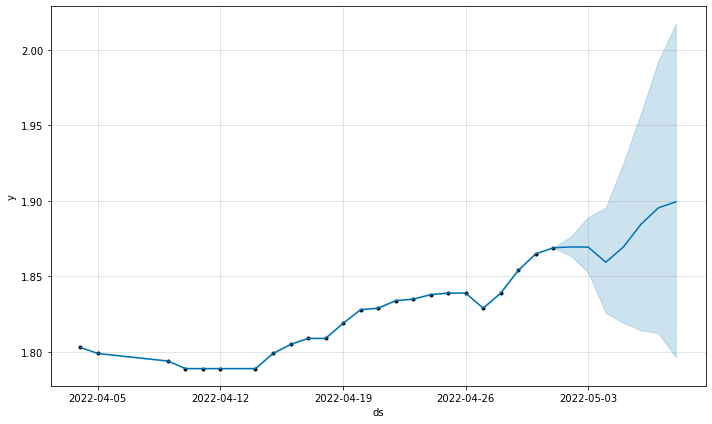

In [19]:
graph = my_model.plot(predict, uncertainty=True)
graph.savefig("aaa.jpg")


In [20]:
#my_model.plot(predict, uncertainty=False)

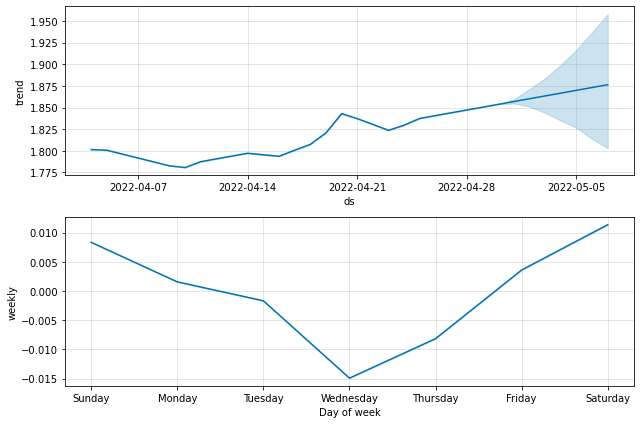

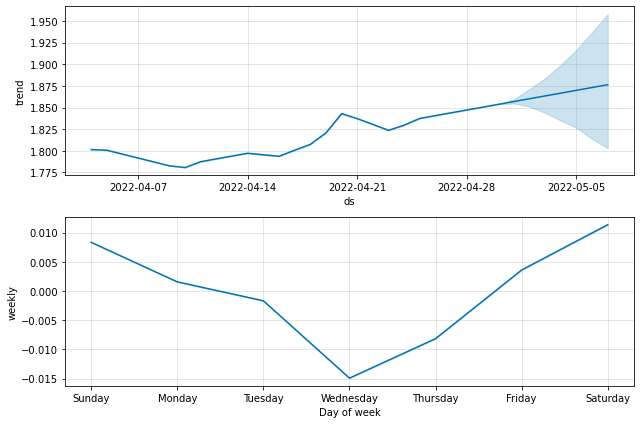

In [83]:
my_model.plot_components(predict)

In [21]:
#df_acum.info()

## funciones pipeline

In [25]:
def prediction(df_acum):
    df_acum['Precio gasolina 95 E5'] = df_acum['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
    df_acum.drop(df_acum.loc[df_acum['Precio gasolina 95 E5']=='No disponible'].index, inplace=True)
    df_acum['Precio gasolina 95 E5']=df_acum['Precio gasolina 95 E5'].astype('float64')
    df_todas_gasolineras = df_acum.groupby(["Fecha de extracción"])["Precio gasolina 95 E5"].median()
    df_prophet_espana=pd.DataFrame(df_todas_gasolineras).reset_index()
    df_prophet_espana.columns = ['ds', 'y']
    format_data = '%d-%m-%Y'
    df_prophet_espana['ds']=df_prophet_espana['ds'].apply(lambda x: datetime.datetime.strptime(x,format_data))
    my_model = Prophet(interval_width=0.8, daily_seasonality=False, yearly_seasonality=False)
    my_model.fit(df_prophet_espana, iter=100)
    future = my_model.make_future_dataframe(periods=7)
    predict= my_model.predict(future)
    predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)
    graph = my_model.plot(predict, uncertainty=True)
    graph.savefig("aaa.jpg")
    my_model.plot_components(predict)
    return graph
    

2022-05-02 13:32:03.664 INFO    prophet: n_changepoints greater than number of observations. Using 18.



Initial log joint probability = -7.23997
Iteration  1. Log joint probability =    30.7465. Improved by 37.9865.
Iteration  2. Log joint probability =    85.8847. Improved by 55.1382.
Iteration  3. Log joint probability =    90.1228. Improved by 4.23806.
Iteration  4. Log joint probability =    119.171. Improved by 29.0478.
Iteration  5. Log joint probability =    126.589. Improved by 7.41809.
Iteration  6. Log joint probability =    127.547. Improved by 0.958092.
Iteration  7. Log joint probability =    132.647. Improved by 5.10011.
Iteration  8. Log joint probability =    132.902. Improved by 0.254692.
Iteration  9. Log joint probability =    133.384. Improved by 0.481993.
Iteration 10. Log joint probability =    134.111. Improved by 0.727752.
Iteration 11. Log joint probability =     135.09. Improved by 0.978212.
Iteration 12. Log joint probability =    135.307. Improved by 0.217323.
Iteration 13. Log joint probability =    135.344. Improved by 0.0374116.
Iteration 14. Log joint pro

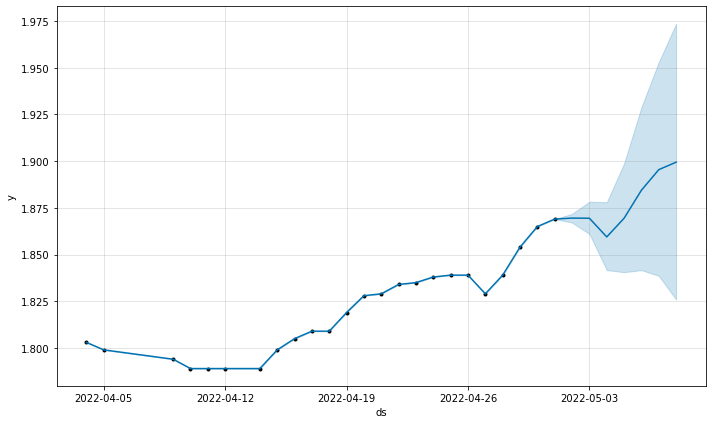

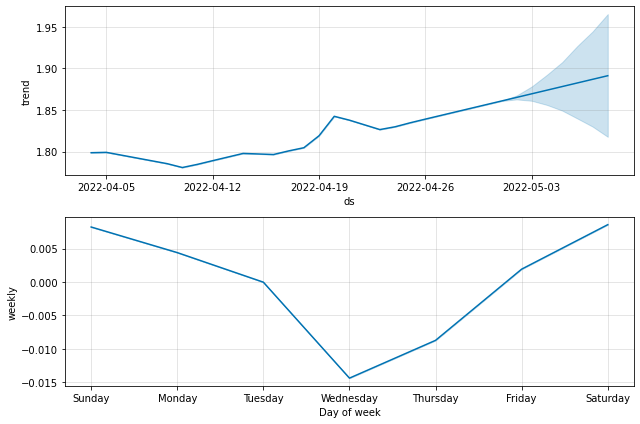

In [26]:
graph=prediction(df_acum)